## XGBoost example

In [32]:
import xgboost as xgb
import pandas as pd  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split  


In [33]:
# Iris Data
iris = load_iris()  

iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)  
iris_target = pd.Series(iris.target)  

train_x, test_x, train_y, test_y = train_test_split(iris_data, iris_target, test_size=0.2, shuffle=True)  
dtrain = xgb.DMatrix(train_x, label=train_y)  

In [34]:
# Training
param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax', 'num_class': 3}

num_round = 10  
bst = xgb.train(param, dtrain, num_round) 

dtest = xgb.DMatrix(test_x)  
pred = bst.predict(dtest)

In [35]:
# Eval the trained model

from sklearn.metrics import accuracy_score  

score = accuracy_score(test_y, pred)  
print('score:{0:.4f}'.format(score))  

score:0.9667


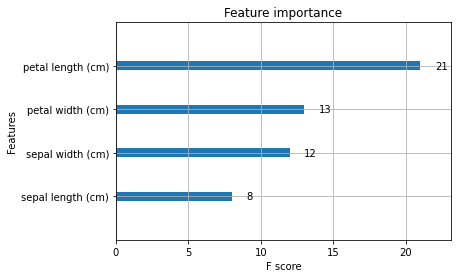

In [36]:
xgb.plot_importance(bst) 

## 学習中のValidation

In [37]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, shuffle=True)
dtrain = xgb.DMatrix(train_x, label=train_y)  
dvalid = xgb.DMatrix(valid_x, label=valid_y) 

In [38]:
# Training the model

param = {'max_depth': 2, 'eta': 0.5, 'objective': 'multi:softmax', 'num_class': 3, 'eval_metric': 'mlogloss'}

evallist = [(dvalid, 'eval'), (dtrain, 'train')]  
num_round = 10000  
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=5) 

[0]	eval-mlogloss:0.557535	train-mlogloss:0.58892
Multiple eval metrics have been passed: 'train-mlogloss' will be used for early stopping.

Will train until train-mlogloss hasn't improved in 5 rounds.
[1]	eval-mlogloss:0.339119	train-mlogloss:0.370353
[2]	eval-mlogloss:0.219611	train-mlogloss:0.258453
[3]	eval-mlogloss:0.156923	train-mlogloss:0.191799
[4]	eval-mlogloss:0.122735	train-mlogloss:0.152997
[5]	eval-mlogloss:0.107168	train-mlogloss:0.12624
[6]	eval-mlogloss:0.092676	train-mlogloss:0.10582
[7]	eval-mlogloss:0.084045	train-mlogloss:0.090547
[8]	eval-mlogloss:0.077449	train-mlogloss:0.080894
[9]	eval-mlogloss:0.07864	train-mlogloss:0.072492
[10]	eval-mlogloss:0.07396	train-mlogloss:0.066847
[11]	eval-mlogloss:0.076019	train-mlogloss:0.062252
[12]	eval-mlogloss:0.079147	train-mlogloss:0.058811
[13]	eval-mlogloss:0.075571	train-mlogloss:0.055026
[14]	eval-mlogloss:0.075223	train-mlogloss:0.052894
[15]	eval-mlogloss:0.077484	train-mlogloss:0.048335
[16]	eval-mlogloss:0.077577	tra

In [39]:
print('Best Score:{0:.4f}, Iteratin:{1:d}, Ntree_Limit:{2:d}'.format(  
     bst.best_score, bst.best_iteration, bst.best_ntree_limit))  

Best Score:0.0187, Iteratin:1306, Ntree_Limit:1307


In [40]:
# Evalu the trained model

dtest = xgb.DMatrix(test_x)  
pred = ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit) 

score = accuracy_score(test_y, pred)  
print('score:{0:.4f}'.format(score))  

score:0.9667
